In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"unniamz","key":"48e2ef8ea94e18ad654ecc5244c20987"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! mv kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 97% 593M/612M [00:10<00:00, 41.6MB/s]
100% 612M/612M [00:10<00:00, 63.1MB/s]


In [ ]:
! ls

drive  gtsrb-german-traffic-sign.zip  sample_data


In [ ]:
!mkdir Traffic_ger

In [ ]:
! unzip gtsrb-german-traffic-sign.zip -d Traffic_ger

Streaming output truncated to the last 5000 lines.
  inflating: Traffic_ger/train/5/00005_00053_00010.png  
  inflating: Traffic_ger/train/5/00005_00053_00011.png  
  inflating: Traffic_ger/train/5/00005_00053_00012.png  
  inflating: Traffic_ger/train/5/00005_00053_00013.png  
  inflating: Traffic_ger/train/5/00005_00053_00014.png  
  inflating: Traffic_ger/train/5/00005_00053_00015.png  
  inflating: Traffic_ger/train/5/00005_00053_00016.png  
  inflating: Traffic_ger/train/5/00005_00053_00017.png  
  inflating: Traffic_ger/train/5/00005_00053_00018.png  
  inflating: Traffic_ger/train/5/00005_00053_00019.png  
  inflating: Traffic_ger/train/5/00005_00053_00020.png  
  inflating: Traffic_ger/train/5/00005_00053_00021.png  
  inflating: Traffic_ger/train/5/00005_00053_00022.png  
  inflating: Traffic_ger/train/5/00005_00053_00023.png  
  inflating: Traffic_ger/train/5/00005_00053_00024.png  
  inflating: Traffic_ger/train/5/00005_00053_00025.png  
  inflating: Traffic_ger/train/5/0000

In [ ]:
!ls ./Traffic_ger

meta  Meta  Meta.csv  test  Test  Test.csv  train  Train  Train.csv


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('./Traffic_ger')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:

data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [ ]:
cur_path

'/content/Traffic_ger'

In [ ]:
data_dir = '/content/Traffic_ger'
train_path = '/content/Traffic_ger/Train'
test_path = '/content/Traffic_ger/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [ ]:
# We will time our model
import time
start = time.time()

input_path = "./content/Traffic_ger"

image_data = []
image_labels = []

# Number of total classes
total_classes = 43

# Dimensions of our images
height = 32
width = 32
channels = 3

In [ ]:
for i in range(total_classes):
    path =  '/content/Traffic_ger/Train/'+ str(i)
    images = os.listdir(path)
    
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, "RGB")
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in Image loading")
            
# Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Time taken to load our images in seconds
end = time.time()
print("Time taken: ", round(end-start, 5), "seconds")

Time taken:  835.59588 seconds


In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)

image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
# Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.3,
                                                     random_state=2666, shuffle=True)

# Scale the values between 0 and 1
X_train = X_train / 255
X_valid = X_valid / 255

# The dimensions concur
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)


X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [ ]:
# Converting the labels into one hot encoding
import keras
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

In [ ]:
# The dimensions concur
print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [ ]:

# Create our model with Keras is straightforward
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=18, kernel_size=(5,5), strides=1, activation="relu", 
                        input_shape=(height, width, channels)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=36, kernel_size=(5,5), strides=1, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=36, kernel_size=(5, 5), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(1,1)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=72, activation="relu"),
    keras.layers.Dense(units=43, activation="softmax"),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 18)        1368      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 36)        16236     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 36)          32436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36)               

In [ ]:
# Compilation of our model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid))
validation_data = (X_valid, y_valid)

Epoch 1/20
981/981 [==============================] - 4s 4ms/step - loss: 2.2366 - accuracy: 0.4123 - val_loss: 0.4171 - val_accuracy: 0.8898
Epoch 2/20
981/981 [==============================] - 4s 4ms/step - loss: 0.3254 - accuracy: 0.9107 - val_loss: 0.1837 - val_accuracy: 0.9561
Epoch 3/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1598 - accuracy: 0.9569 - val_loss: 0.1431 - val_accuracy: 0.9648
Epoch 4/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1014 - accuracy: 0.9743 - val_loss: 0.1439 - val_accuracy: 0.9635
Epoch 5/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0665 - accuracy: 0.9812 - val_loss: 0.0893 - val_accuracy: 0.9786
Epoch 6/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0503 - accuracy: 0.9856 - val_loss: 0.0871 - val_accuracy: 0.9797
Epoch 7/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0413 - accuracy: 0.9879 - val_loss: 0.0869 - val_accuracy: 0.9814
Epoch 

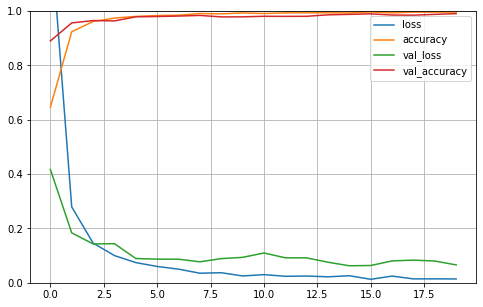

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
test = pd.read_csv("/content/Traffic_ger/Test.csv")

labels = test["ClassId"].values
test_imgs = test["Path"].values

(1, 32, 32, 3)
33


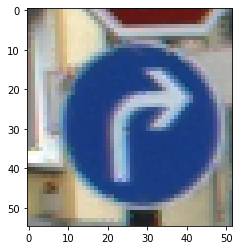

In [ ]:
# How an image looks like
img_index = 21
image = Image.open('/content/Traffic_ger/'+test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img) / 255.
img = img.reshape(1, height, width, channels)

print(img.shape)
print(labels[img_index])
plt.imshow(image)

In [ ]:
classes = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
     25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
}


In [ ]:
pred = model.predict_classes(img)[0]
print(pred)

sign = classes[pred]
print(sign)

0
Speed limit (20km/h)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
start = time.time()
test = pd.read_csv('/content/Traffic_ger/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

for img in imgs:
    try:
        image = cv2.imread('/content/Traffic_ger/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error")
        
X_test = np.array(data)
X_test = X_test / 255


In [ ]:
# Prediction of test set
pred = model.predict_classes(X_test)

#Accuracy with the test data
print(accuracy_score(labels, pred))
end = time.time()
print("Time taken: ", round(end-start,5), "seconds")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9435471100554236
Time taken:  21.13088 seconds


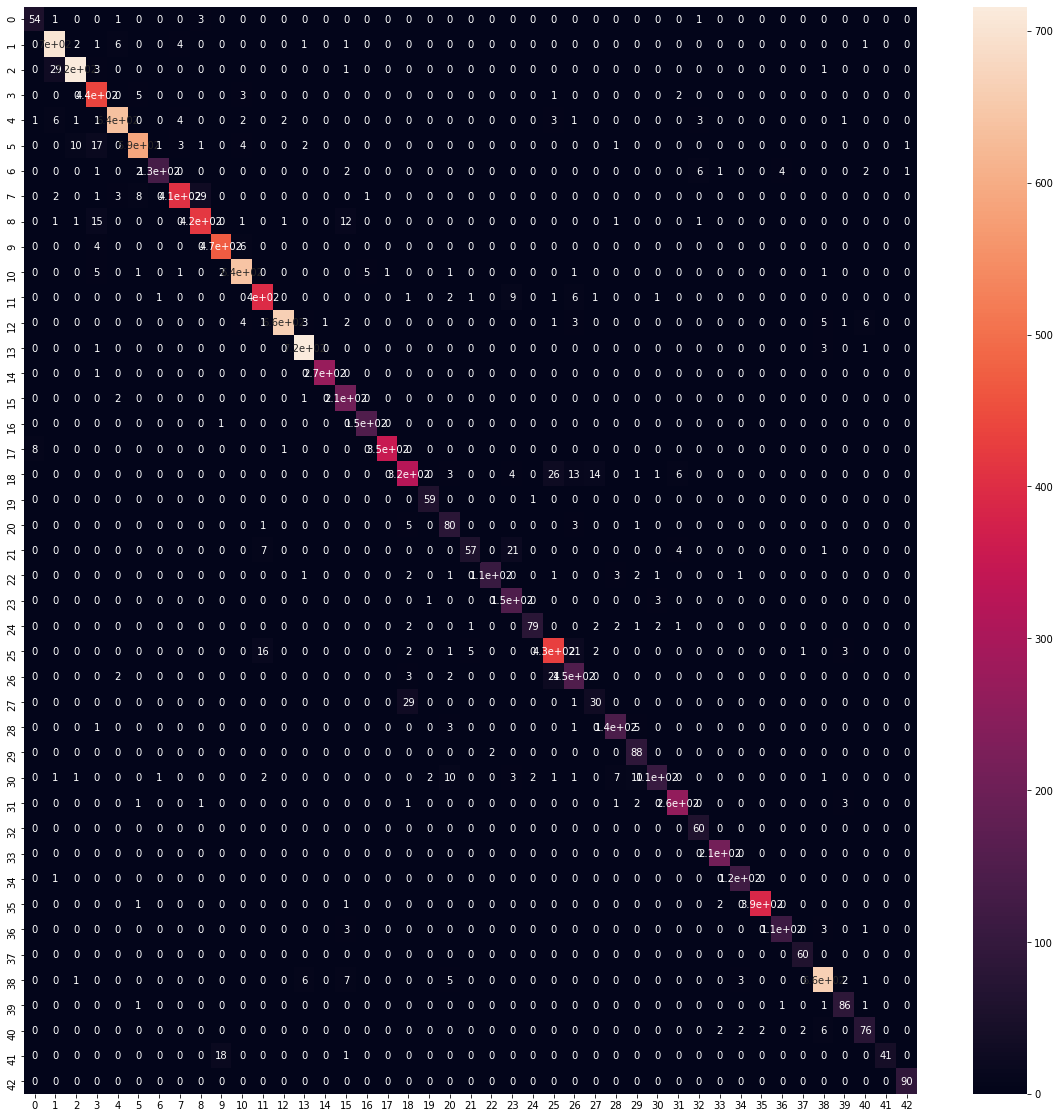

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)
    



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.94      0.98      0.96       720
           2       0.98      0.95      0.97       750
           3       0.90      0.98      0.93       450
           4       0.98      0.96      0.97       660
           5       0.97      0.94      0.95       630
           6       0.98      0.87      0.92       150
           7       0.97      0.90      0.94       450
           8       0.92      0.93      0.93       450
           9       0.96      0.98      0.97       480
          10       0.97      0.97      0.97       660
          11       0.94      0.95      0.94       420
          12       0.99      0.96      0.98       690
          13       0.98      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.87      0.99      0.93       210
          16       0.96      0.99      0.98       150
          17       1.00    

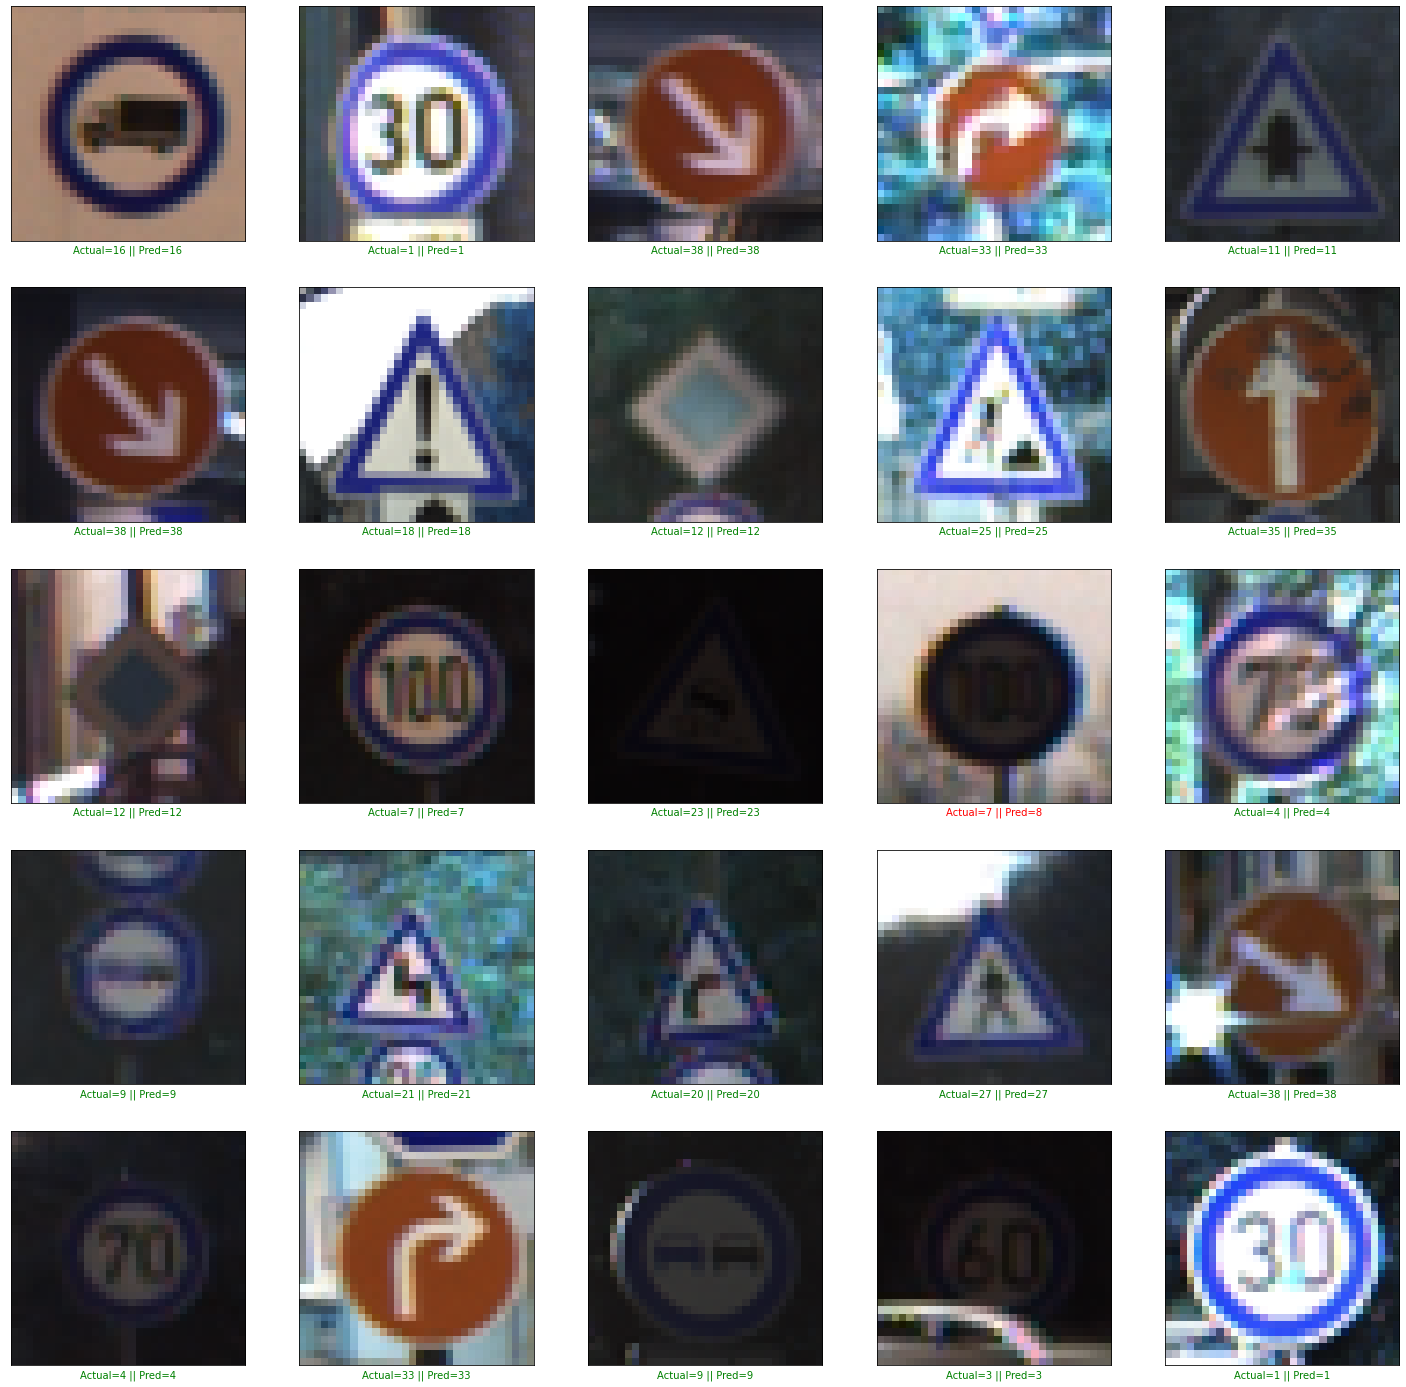

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
model.save('./content/Traffic_ger/TRG.h5')

In [ ]:

import os
os.chdir('/content/Traffic_ger/')
from keras.models import load_model
model = load_model('./content/Traffic_ger/TRG.h5')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_valid=np.array(data)
    Y_pred = model.predict_classes(X_valid)
    return image,Y_pred